In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

## 1. Load the Dataset

In [52]:
data=pd.read_csv("Iris.csv")

In [53]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## 2. Quick Dataset Summary

In [4]:
print(data.shape)

(150, 6)


In [54]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


* the sepal length and sepal width have relatively small standard deviations, suggesting that the data points are clustered closely together.

* the petal length and petal width have larger standard deviations, indicating more variability in these measurements.

In [7]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* there are no missing values

In [8]:
data = data.drop(['Id'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

* Id is the unique identifier for each flower. In this machine learning project, it will not help with our model's training and testing. Let's drop the Id column first

In [9]:
data.shape

(150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 4 of the columns are numeric attributes we can use to train machine learning models and the last column is the label of a given flower.

## 3. EDA

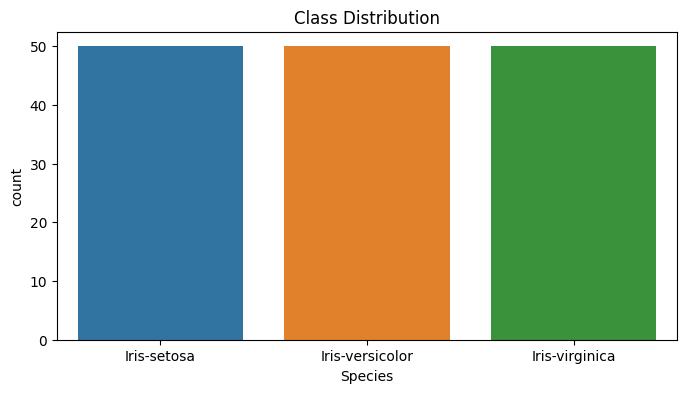

In [13]:
# Distribution of target classes
plt.figure(figsize=(8, 4))
sns.countplot(x='Species', data=data)
plt.title('Class Distribution')
plt.show()

*  the dataset is balanced, meaning each species has a similar number of samples. This is a good sign for classification, as the model is likely to be exposed to an adequate number of examples for each class.

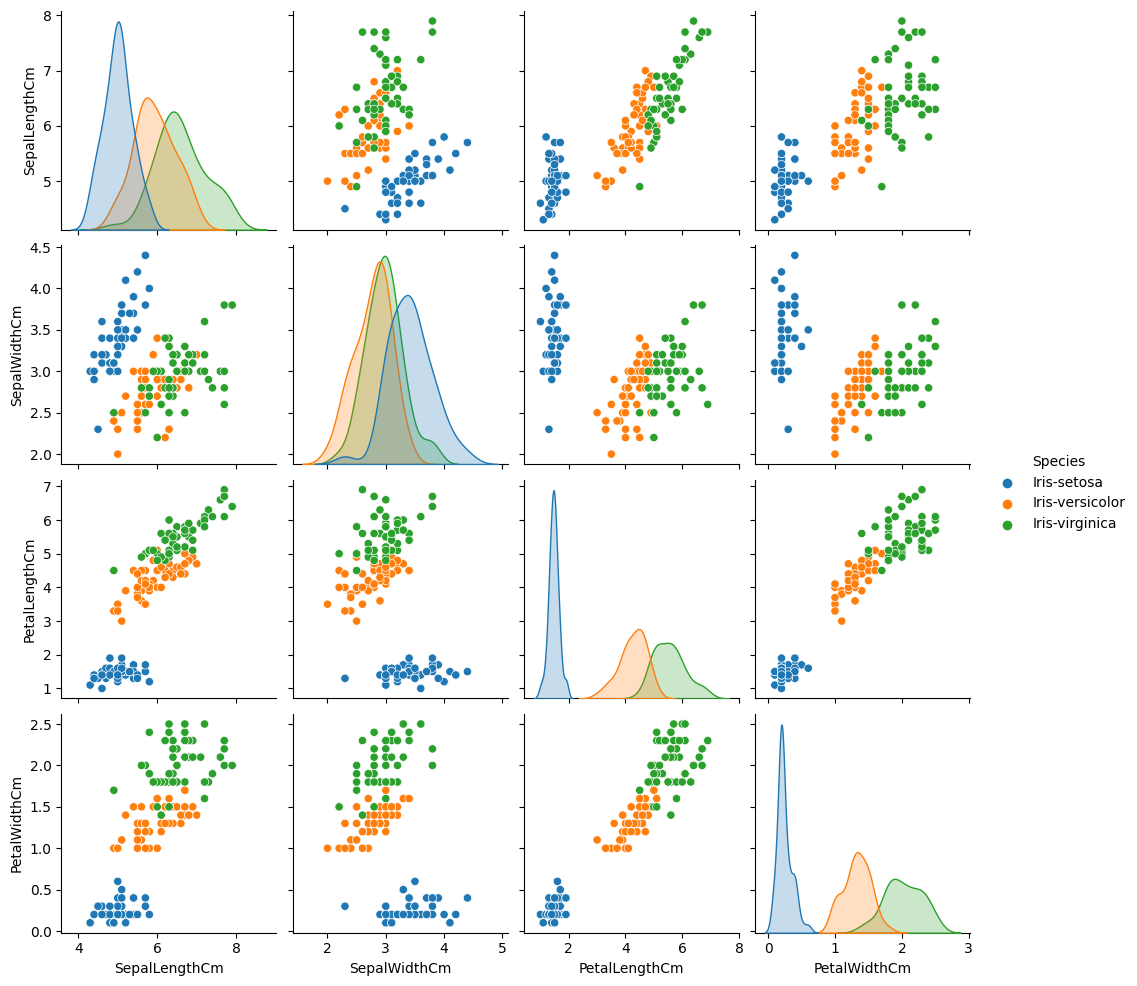

In [15]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Species')
plt.show()

* In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pari-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm

* the versicolor and virginica will be a little hard to identify because they are overlapping compared to setosa which is clustered together

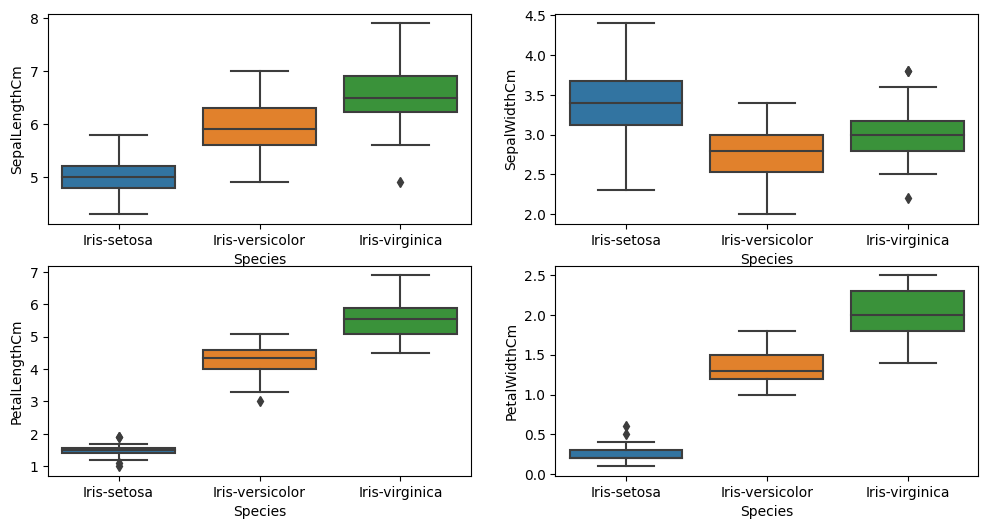

In [16]:
# Box plots to visualize feature distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

* there are outliers in this dataset

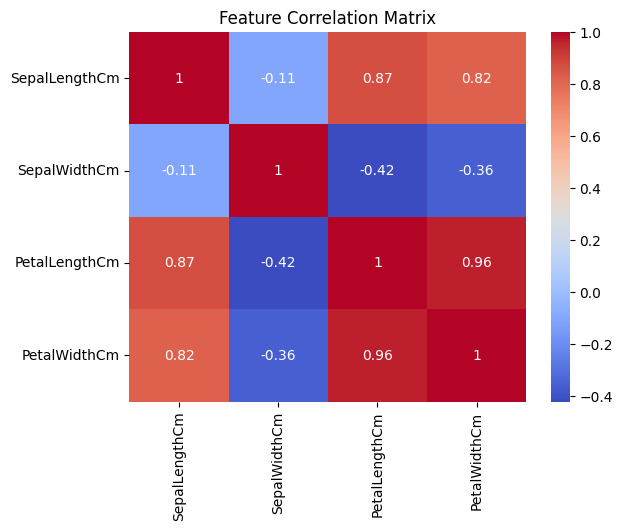

In [17]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

* the shades of red show positive correlation which means When one variable increases, the other tends to increase.

* the shades of blue show negative correlation which means when one variable increases, the other tends to decrease.

## 4. Data Modeling

Classification problem: our goal is to predict the flow 'Species' with given 4 features: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', and 'PetalWidthCm'.

### Encode the Target Variable (Label Encoding)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Species' column
data['Species'] = label_encoder.fit_transform(data['Species'])

In [21]:
# Display unique values in the 'Species' column
unique_labels = data['Species'].unique()
print("Unique Encoded Labels:", unique_labels)

Unique Encoded Labels: [0 1 2]


In [24]:
data.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Feature Scaling (Standardization)

In [27]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler
scaler = StandardScaler()

# Apply standardization to the feature columns
data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

Standardization scales each feature to have a mean of 0 and a standard deviation of 1. This ensures that the features are on the same scale, which can help the performance of certain algorithms.

###  Data Splitting

In [112]:
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.model_selection import train_test_split

# Define your feature matrix (X) and target vector (y)
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 * 70% of the data will be used for training, and 30% for testing

In [30]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", y_train.shape)
print("Y_test.shape:", y_test.shape)

X_train.shape: (105, 4)
X_test.shape: (45, 4)
Y_train.shape: (105,)
Y_test.shape: (45,)


In [58]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,-0.416010,-1.513375,-0.033361,-0.261193
133,0.553333,-0.587764,0.762759,0.396172
137,0.674501,0.106445,0.990221,0.790591
75,0.916837,-0.124958,0.364699,0.264699
109,1.643844,1.263460,1.331416,1.710902


In [60]:
y_train

81     1
133    2
137    2
75     1
109    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 105, dtype: int64

### Model Selection

What is our baseline?

* What is the simplest model we can think of?

* In tis case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point we should expect to have a model accuracy of 0.33 or 33% since we have 3 different classes

* so our model should beat 33% accuracy

#### Simple Manual Model

In [65]:
def single_feature_prediction(petal_length):
  # predicts Iris species given the petal length
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.8:
    return 1
  else:
    return 2

In [72]:
X_train['PetalLengthCm'].values

array([-0.03336121,  0.76275864,  0.99022146,  0.36469871,  1.33141568,
        0.25096731,  1.6157442 ,  0.42156442, -1.3412724 ,  1.67260991,
        0.1941016 , -1.3412724 , -1.39813811, -1.05694388, -0.14709262,
        0.64902723, -1.05694388, -1.227541  , -1.17067529,  0.25096731,
       -1.2844067 ,  0.25096731,  1.67260991, -1.3412724 ,  0.30783301,
        0.70589294, -1.3412724 ,  0.59216153,  0.76275864,  0.1372359 ,
        0.42156442,  0.93335575,  0.1372359 , -1.17067529, -0.26082403,
        0.87649005, -1.3412724 , -1.45500381,  0.02350449,  0.70589294,
       -1.2844067 ,  0.76275864, -1.2844067 , -1.227541  ,  0.59216153,
       -0.43142114,  1.10395287,  0.76275864,  1.04708716,  1.33141568,
        0.1372359 , -1.3412724 , -1.51186952,  0.70589294,  1.27454998,
       -1.2844067 , -1.3412724 , -1.39813811,  0.64902723,  1.04708716,
       -1.3412724 ,  0.99022146,  1.27454998, -1.39813811,  0.53529583,
        0.47843012,  0.59216153,  0.53529583,  0.87649005, -1.22

In [76]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train['PetalLengthCm']])

In [77]:
manual_y_predictions == y_train

81     False
133    False
137    False
75     False
109    False
       ...  
71     False
106    False
14      True
92     False
102    False
Name: Species, Length: 105, dtype: bool

In [80]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)
print("The manual model accuracy is: ")
manual_model_accuracy * 100

The manual model accuracy is: 


29.523809523809526

#### Logistic Regression

##### Using a validation set to evaluate our LR model

* split off a separate segment of our training data

In [83]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression()


In [88]:
# Xt = X_train, Xv = X_validation
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [86]:
print("Xt.shape:", Xt.shape)
print("Xv.shape:", Xv.shape)
print("yt.shape:", yt.shape)
print("yv.shape:", yv.shape)

Xt.shape: (73, 4)
Xv.shape: (32, 4)
yt.shape: (73,)
yv.shape: (32,)


In [89]:
# Train the model on the training data
model.fit(Xt, yt)

LogisticRegression()

In [92]:
y_pred = model.predict(Xv)
y_pred

array([1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0])

In [93]:
logistic_regression_model_accuracy = np.mean(y_pred == yv)
print("The logistic regression model accuracy is: ")
logistic_regression_model_accuracy * 100

The logistic regression model accuracy is: 


87.5

In [82]:
# not best practice becaujse we're evaluating our model on the same data we trained with from above
model.score(X_train, y_train)

0.9619047619047619

In [94]:
model.score(Xv, yv)

0.875

##### Using cross-validation set to evaluate our LR model

In [95]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [96]:
model = LogisticRegression()

In [98]:
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

array([0.95238095, 0.9047619 , 0.9047619 , 1.        , 0.95238095])

In [99]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [100]:
np.mean(accuracies)

0.9428571428571428

##### Where are we misclassifying points

In [101]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [102]:
y_pred

array([1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

* the above predictions are being made by a model that was not trained on that data

In [104]:
model_accuracy = np.mean(y_pred == y_train)
print("The logistic regression model accuracy with cross validation is: ")
model_accuracy * 100

The logistic regression model accuracy with cross validation is: 


94.28571428571428

In [109]:
predicted_correctly_mask = y_pred == y_train
predicted_correctly_mask

81      True
133    False
137     True
75      True
109     True
       ...  
71      True
106    False
14      True
92      True
102     True
Name: Species, Length: 105, dtype: bool

In [106]:
not_predicted_correctly_mask = -predicted_correctly_mask

In [108]:
X_train[not_predicted_correctly_mask]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
133,0.553333,-0.587764,0.762759,0.396172
77,1.038005,-0.124958,0.705893,0.659118
70,0.068662,0.337848,0.592162,0.790591
83,0.189830,-0.819166,0.762759,0.527645
119,0.189830,-1.976181,0.705893,0.396172
106,-1.143017,-1.281972,0.421564,0.659118


In [121]:
predictions = pd.concat([X_train, y_train], axis=1)
predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,5.5,2.4,3.7,1.0,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica


In [125]:
predictions['correct_predictions'] = predicted_correctly_mask
predictions['prediction'] = y_pred
predictions['prediction_label'] = predictions['prediction'].map({0: 'setosa', 1: 'vesicolor', 2: 'virginica'})
predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,correct_predictions,prediction,prediction_label
81,5.5,2.4,3.7,1.0,Iris-versicolor,True,1,vesicolor
133,6.3,2.8,5.1,1.5,Iris-virginica,False,1,vesicolor
137,6.4,3.1,5.5,1.8,Iris-virginica,True,2,virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor,True,1,vesicolor
109,7.2,3.6,6.1,2.5,Iris-virginica,True,2,virginica


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

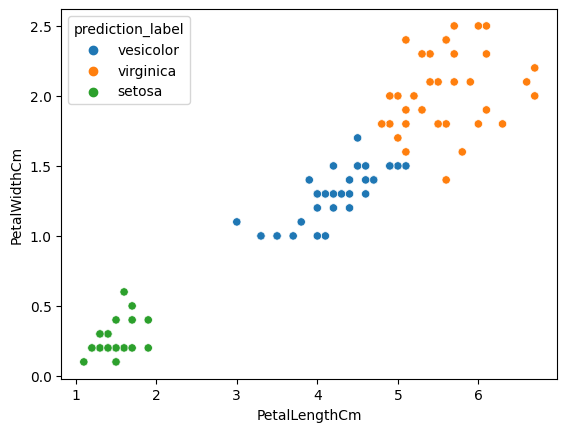

In [126]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='prediction_label', data=predictions)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

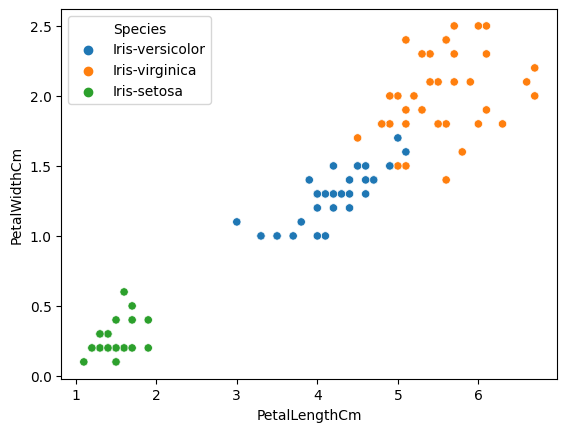

In [127]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=predictions)

In [134]:
def plot_incorrect_predictions(predictions, x_axis_feature, y_axis_feature):
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  axs = axs.flatten()

  sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=predictions, ax=axs[0])
  sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='Species', data=predictions, ax=axs[1])
  sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_predictions', data=predictions, ax=axs[2])
  axs[3].set_visible(False)

  plt.show()

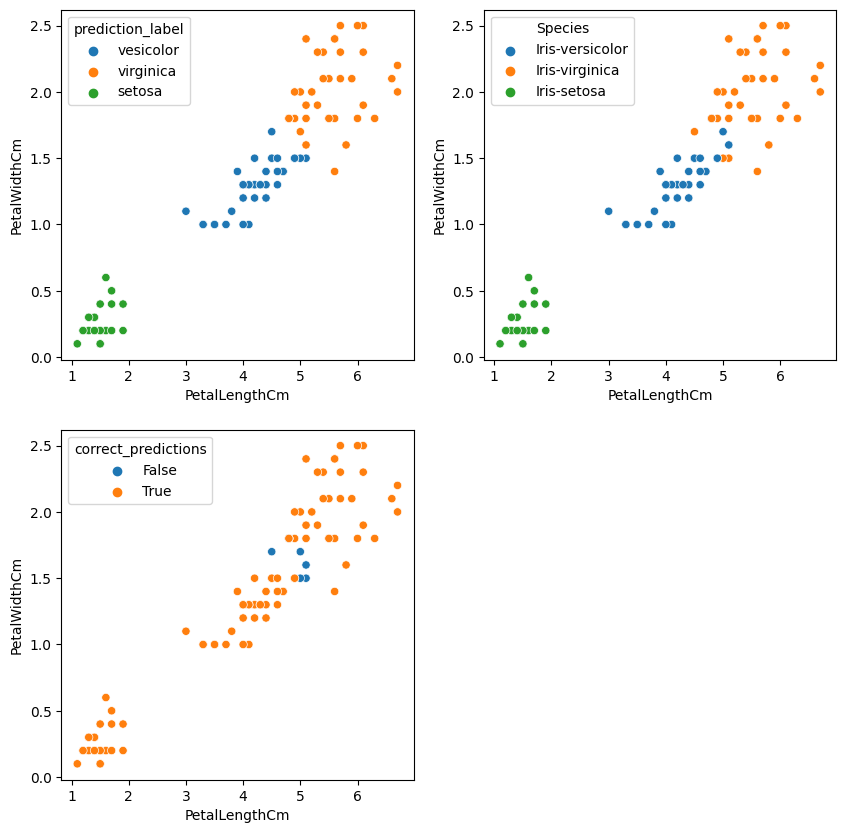

In [135]:
plot_incorrect_predictions(predictions, 'PetalLengthCm', 'PetalWidthCm')

### Model Tuning

Model tuning is trying to determine the parameters of your model (hyperparameters) that maximize the model performance

In [151]:
for reg_param in ( 1, 1.3, 1.9, 2, 2.3, 2.6, 2.9, 3):
  print(reg_param)
  model = LogisticRegression(C=reg_param)
  accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
  print("Accuracy" ,{np.mean(accuracies) * 100})

1
Accuracy {96.19047619047618}
1.3
Accuracy {96.19047619047618}
1.9
Accuracy {96.19047619047618}
2
Accuracy {96.19047619047618}
2.3
Accuracy {96.19047619047618}
2.6
Accuracy {96.19047619047618}
2.9
Accuracy {95.23809523809523}
3
Accuracy {95.23809523809523}


### Final Model

In [152]:
 model = LogisticRegression(C=2)

### How well does our model do on the test set

In [153]:
model.fit(X_train, y_train)

LogisticRegression(C=2)

In [154]:
y_test_pred = model.predict(X_test)

In [156]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [157]:
print("The test set accuracy: ", {test_set_accuracy * 100})

The test set accuracy:  {100.0}


In [158]:
test_set_correctly_classified

73     True
18     True
118    True
78     True
76     True
31     True
64     True
141    True
68     True
82     True
110    True
12     True
36     True
9      True
19     True
56     True
104    True
69     True
55     True
132    True
29     True
127    True
26     True
128    True
131    True
145    True
108    True
143    True
45     True
30     True
22     True
15     True
65     True
11     True
42     True
146    True
51     True
27     True
4      True
32     True
142    True
85     True
86     True
16     True
10     True
Name: Species, dtype: bool

* in conclusion we achieved 100% accuracy on the test dataset using a Logistic Regression model